# EDA of ADNI dataset
## Numerical EDA
### General information
ADNI dataset (https://www.oasis-brains.org)
- Number of subjects: 831
- Number of MRI scans: 2886
- AD classification: 
  - CN (normal control, CDR = 0)
  - MCI (mild cognitive impairment, CDR = 0.5)
  - AD (Alzheimer's disease dementia, CDR = 0.5 or 1)

### Libraries

In [64]:
# import libraries for data analysis and visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set a colorcode for all the plots 
sns.set_palette(palette='ch:start=.2,rot=-.3')

# set figure size for higher resolution
sns.set(rc={'figure.figsize':(6,3)})
plt.rcParams['figure.dpi'] = 100

### Dataset

In [65]:
df = pd.read_csv("../data/FreeSurfer_8_23_2022.csv")

### Data overview

In [66]:
df.head(3)

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I185317,941_S_1363,MCI,F,70,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,3/12/2007,MGH,8/23/2022
1,I185316,941_S_1363,MCI,F,70,1,MRI,FreeSurfer Cross-Sectional Processing aparc+aseg,Post-processed,3/12/2007,MGH,8/23/2022
2,I173268,941_S_1311,MCI,M,69,1,MRI,FreeSurfer Cross-Sectional Processing aparc+aseg,Post-processed,3/02/2007,MGH,8/23/2022


In [67]:
df.tail(3)

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
2883,I252116,002_S_0413,CN,F,76,1,MRI,FreeSurfer Cross-Sectional Processing aparc+aseg,Post-processed,5/02/2006,MGH,8/23/2022
2884,I167591,002_S_0295,CN,M,85,1,MRI,FreeSurfer Cross-Sectional Processing aparc+aseg,Post-processed,4/18/2006,MGH,8/23/2022
2885,I167590,002_S_0295,CN,M,85,1,MRI,FreeSurfer Cross-Sectional Processing brainmask,Post-processed,4/18/2006,MGH,8/23/2022


In [68]:
# number of unique entries for each column
for i in df:
    n = df[i].nunique()
    print(f"{i}: {n}")

Image Data ID: 2886
Subject: 831
Group: 3
Sex: 2
Age: 37
Visit: 1
Modality: 1
Description: 4
Type: 1
Acq Date: 357
Format: 1
Downloaded: 1


### Demographic

In [69]:
# drop columns with just one unique entry
df.drop(["Visit","Modality","Type","Format","Downloaded"],axis=1, inplace=True)

# drop columns irrelevant for demographic analysis
df.drop(["Description","Acq Date"],axis=1, inplace=True)

In [70]:
# rename columns to avoid spaces
df.rename(columns={"Image Data ID":"Image_data_ID"},inplace=True);

In [71]:
df.head(3)

,Image_data_ID,Subject,Group,Sex,Age
0,I185317,941_S_1363,MCI,F,70
1,I185316,941_S_1363,MCI,F,70
2,I173268,941_S_1311,MCI,M,69


In [72]:
# number of subjects
print(f"Number of studied subjects: {df.Subject.nunique()}")

Number of studied subjects: 831


In [73]:
# number of MRI scans (considering longitudinal and cross-sectional images separately)
print(f"Number of MRI scans: {df.Image_data_ID.nunique()}")

Number of MRI scans: 2886


In [74]:
# group by subject and remove duplicates
df1 = df.groupby("Subject")
df = df1.max().reset_index()
df.drop("Image_data_ID", axis=1, inplace=True)

In [75]:
df.head(3)

,Subject,Group,Sex,Age
0,002_S_0295,CN,M,85
1,002_S_0413,CN,F,76
2,002_S_0559,CN,M,79


#### Information of studied subjects

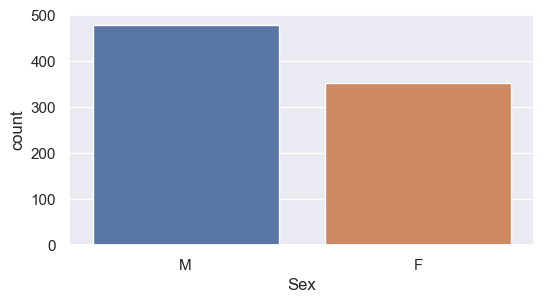

In [76]:
# check distribution of male/female
sns.countplot(data=df, x='Sex');

In [77]:
# check percentage of male/female
df["Sex"].value_counts("M").round(2)

M    0.58
F    0.42
Name: Sex, dtype: float64

Subjects studied are 58% male and 42% female.

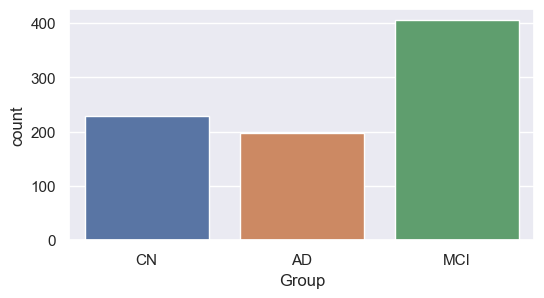

In [78]:
# check distribution of CN, AD and MCI groups
sns.countplot(data = df, x = 'Group');

In [79]:
# check percentage of CN, AD, and MCI groups
df["Group"].value_counts("CN").round(2)

MCI    0.49
CN     0.27
AD     0.24
Name: Group, dtype: float64

27% of the studied subjects are normal controls (CN), 49% have mild cognitive impairment (MCI) and 24% have Alzheimer's disease (AD).

In [80]:
# check age distribution
print(f"min age: {df.Age.min()}; max age: {df.Age.max()}")

# make age bins
df_age = pd.cut(df.Age, bins = 9, labels=['55-59', '59-63',"63-67","67-71","71-75","75-79","79-83","83-87","87-91"])

# add age bins as a new column to the dataframe 
df=df.join(df_age, how='inner', rsuffix='_category')
df.head(3)


min age: 55; max age: 91


,Subject,Group,Sex,Age,Age_category
0,002_S_0295,CN,M,85,83-87
1,002_S_0413,CN,F,76,75-79
2,002_S_0559,CN,M,79,75-79


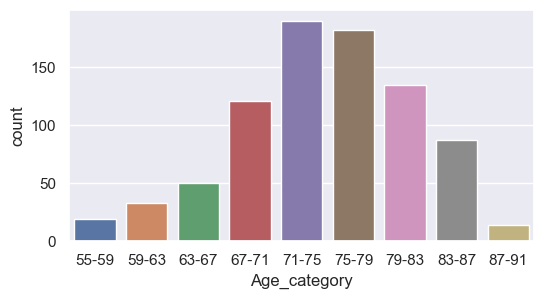

In [81]:
sns.countplot(data = df, x = 'Age_category');

In [82]:
# check percentage of each age category
df["Age_category"].value_counts("55-59").round(2)

71-75    0.23
75-79    0.22
79-83    0.16
67-71    0.15
83-87    0.10
63-67    0.06
59-63    0.04
55-59    0.02
87-91    0.02
Name: Age_category, dtype: float64

The majority of the studied subjects (45%) is between 71 and 79 years old.

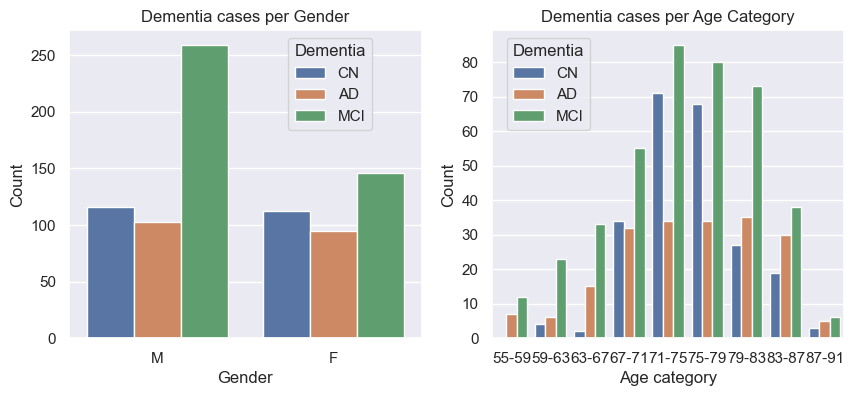

In [83]:
# check distribution of CV, MCI and MCI per sex and age category 
fig, axes = plt.subplots(1,2, figsize=(10, 4))
axes[0].set_title('Dementia cases per Gender')
sns.countplot(data=df, x='Sex', hue='Group', ax=axes[0]).set(xlabel='Gender', ylabel='Count')
axes[0].legend(title='Dementia',bbox_to_anchor=(0.6, 1), loc='upper left')

sns.countplot(data=df, x='Age_category', hue='Group', ax=axes[1]).set(xlabel='Age category', ylabel='Count')
axes[1].set_title('Dementia cases per Age Category')
axes[1].legend(title='Dementia',bbox_to_anchor=(0.02, 1), loc='upper left');

In [84]:
# check percentage of male and female subjects for each group
df_group = df.groupby("Group")
df_group.Sex.value_counts("M").round(2)

Group  Sex
AD     M      0.52
       F      0.48
CN     M      0.51
       F      0.49
MCI    M      0.64
       F      0.36
Name: Sex, dtype: float64

51% of the CN subjects, 52% of the AD subjects and 64% of the MCI subjects are male.

In [95]:
# check percentage of each age category
df_group.Age_category.value_counts("55-59").round(2)

Group       
AD     79-83    0.18
       71-75    0.17
       75-79    0.17
       67-71    0.16
       83-87    0.15
       63-67    0.08
       55-59    0.04
       59-63    0.03
       87-91    0.03
CN     71-75    0.31
       75-79    0.30
       67-71    0.15
       79-83    0.12
       83-87    0.08
       59-63    0.02
       87-91    0.01
       63-67    0.01
       55-59    0.00
MCI    71-75    0.21
       75-79    0.20
       79-83    0.18
       67-71    0.14
       83-87    0.09
       63-67    0.08
       59-63    0.06
       55-59    0.03
       87-91    0.01
Name: Age_category, dtype: float64

The majority of CN and MCI subjects is between 71 and 75 year old (31% of CN and 21% of MCI subjects) and the majority of AD subjects is between 79 and 83 years old (18%).

## Image EDA